In [2]:
import pandas as pd

In [201]:
df = pd.read_table(r"C:\Users\Shaun\Downloads\Source Files(1)\Source Files\flow-cytometry-40k.txt\flow-cytometry-40k.txt", sep=' ', header= None)
df

,0,1,2,3,4,5
0,0,4.315380,5.301481,3.892902,116.485707,11.284839
1,1,2.034189,3.378871,3.017428,63.537658,7.094390
2,2,19.018191,11.923801,5.848890,194.091982,98.327730
3,3,18.117922,14.278425,6.015783,227.966526,145.721575
4,4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...,...
39995,39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [202]:
#Drop the index coloumn due to it being redundant
df = df.drop([0],axis= 1)

In [203]:
#Rename the columns to match the dataset
df.columns = ["FITC-CD3", "PE-CD8", "ECD-CD19", "PC5-CD45", "PC7-CD3"]

df

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [210]:
#Drop any duplicate data
df = df.drop_duplicates()

df

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
1,2.034189,3.378871,3.017428,63.537658,7.094390
4,6.203657,5.125051,2.734187,95.794769,12.134564
5,2.429011,2.443316,1.492502,45.654340,4.559521
6,2.449992,2.475741,3.108028,34.454379,8.450516
11,1.667024,2.372744,3.067973,32.012970,5.431180
...,...,...,...,...,...
39988,0.620843,1.454355,1.684190,18.249529,2.613070
39992,2.161982,2.335551,1.026155,33.355745,6.816871
39993,1.338006,3.498081,1.290323,81.390458,7.633217
39995,2.020838,2.534869,1.887323,59.295711,9.926805


In [205]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39997 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FITC-CD3  39997 non-null  float64
 1   PE-CD8    39997 non-null  float64
 2   ECD-CD19  39997 non-null  float64
 3   PC5-CD45  39997 non-null  float64
 4   PC7-CD3   39997 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,39997.000000,39997.000000,39997.000000,39997.000000,39997.000000
mean,8.171480,7.881919,6.027495,97.889318,29.932184
std,39.871763,26.288559,21.926697,93.692415,52.457143
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.321794,2.037050,1.556398,34.118685,5.251889
50%,2.033236,3.025058,2.521517,49.346971,8.088120
75%,3.602985,8.542069,5.148893,161.773836,18.666285
max,999.970436,999.970436,999.970436,999.970436,999.970436


array([[<Axes: title={'center': 'FITC-CD3'}>,
        <Axes: title={'center': 'PE-CD8'}>],
       [<Axes: title={'center': 'ECD-CD19'}>,
        <Axes: title={'center': 'PC5-CD45'}>],
       [<Axes: title={'center': 'PC7-CD3'}>, <Axes: >]], dtype=object)

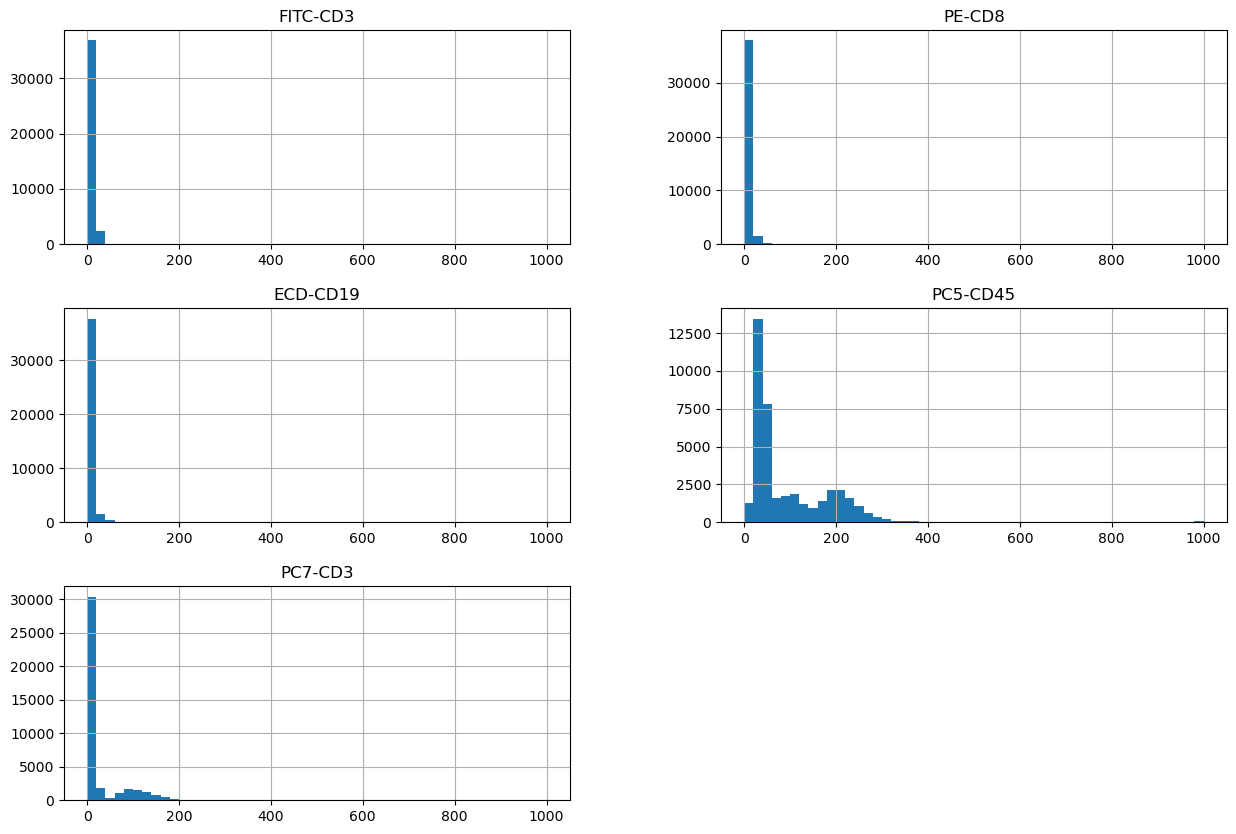

In [206]:
#Visualize data on a histogram to see data spread 
df.hist(bins = 50, figsize = (15,10))

In [207]:
#Remove outliers using IQR method
#Lower outlier boundary: Q1 - (1.5 x IQR) 
#Upper outlier boundary: Q3 + (1.5 x IQR) 

df = df[df["FITC-CD3"] < 7.0247715]
df = df[df["PE-CD8"] < 8.5406385]
df = df[df["ECD-CD19"] < 5.199914]
df = df[df["PC5-CD45"] < 103.683572]
df = df[df["PC7-CD3"] < 16.0417705]
df.describe()

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,25512.000000,25512.000000,25512.000000,25512.000000,25512.000000
mean,1.821943,2.412391,1.934851,41.965044,6.196101
std,0.966615,1.050370,0.973340,19.148386,2.601402
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.152993,1.711847,1.237870,29.998808,4.297261
50%,1.695635,2.264502,1.803400,37.567174,5.983358
75%,2.336743,2.907756,2.499583,47.943161,7.879503
max,6.985671,8.073814,5.199437,103.668312,16.021744


array([[<Axes: title={'center': 'FITC-CD3'}>,
        <Axes: title={'center': 'PE-CD8'}>],
       [<Axes: title={'center': 'ECD-CD19'}>,
        <Axes: title={'center': 'PC5-CD45'}>],
       [<Axes: title={'center': 'PC7-CD3'}>, <Axes: >]], dtype=object)

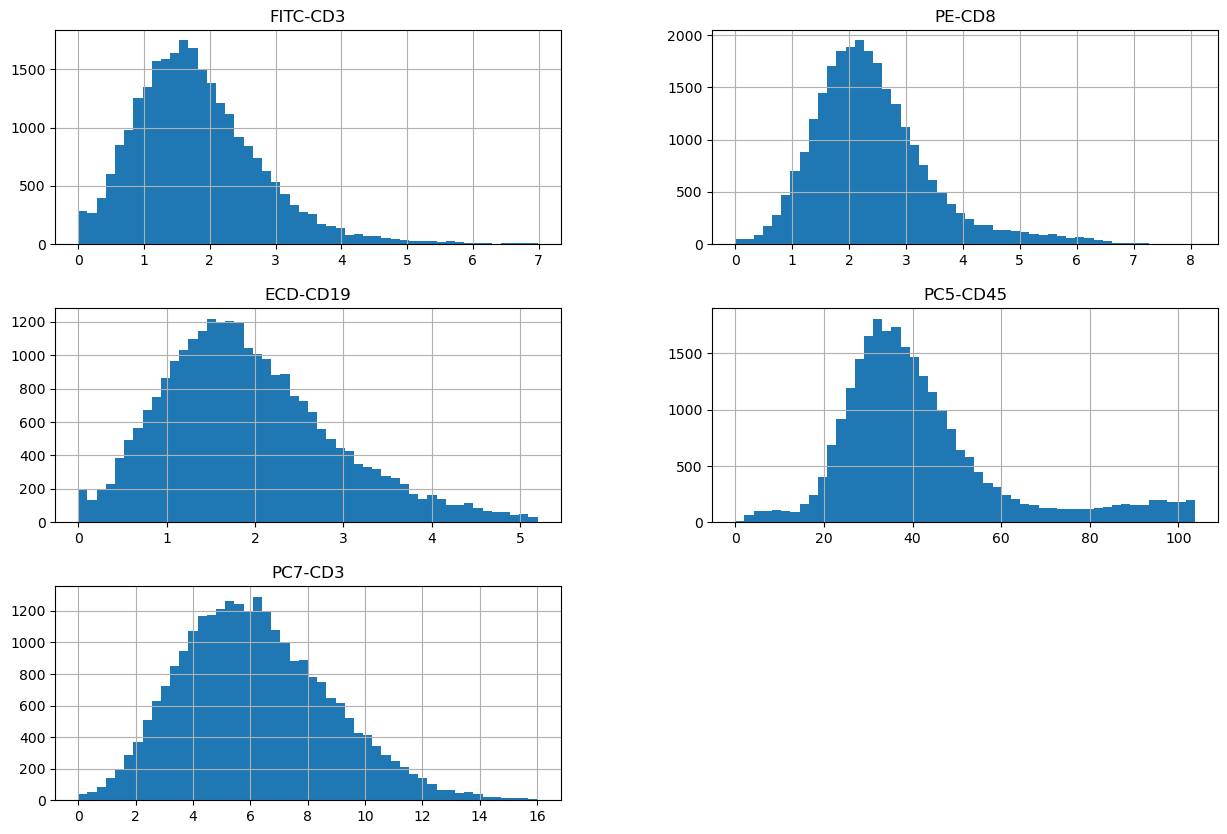

In [208]:
df.hist(bins = 50, figsize = (15,10))